In [21]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [22]:
df = pd.read_csv("data/covid_result.csv", header=None)
df.columns = ["date", "location", "new_count"]

df.drop(df.tail(1).index, inplace=True)

df["date"] = df["date"].str.replace('\t', '')
df["date"] = pd.to_datetime(df["date"])

df["new_count"] = df["new_count"].astype(int)

df = df[df["location"].str.contains("New York")]
# df = df[(df["date"] >= "2020-10-01") & (df["date"] <= "2021-06-30")]

In [23]:
Q3 = df["new_count"].quantile(.75)
Q1 = df["new_count"].quantile(.25)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sub = df[(df["new_count"] >= 0) & (df["new_count"] <= upper_bound)]
df_sub.head(10)

,date,location,new_count
18321,2021-10-12,New York,173
18322,2021-10-11,New York,160
18323,2021-10-10,New York,240
18324,2021-10-09,New York,130
18325,2021-10-08,New York,231
18326,2021-10-07,New York,247
18327,2021-10-06,New York,268
18328,2021-10-05,New York,213
18329,2021-10-04,New York,204
18330,2021-10-03,New York,213


In [36]:
grouped_df = df_sub.groupby("date").agg({"new_count": "sum"})
grouped_df.head(10)

,new_count
date,
2020-03-01,0
2020-03-02,0
2020-03-03,0
2020-03-04,1
2020-03-05,1
2020-03-06,3
2020-03-07,0
2020-03-08,0
2020-03-09,7


In [32]:
grouped_df.tail(10)

,new_count
date,
2021-10-03,213
2021-10-04,204
2021-10-05,213
2021-10-06,268
2021-10-07,247
2021-10-08,231
2021-10-09,130
2021-10-10,240
2021-10-11,160


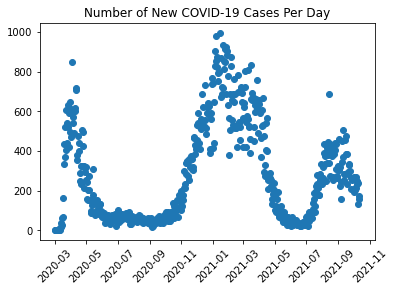

In [35]:
x = grouped_df.index.to_list()
y = grouped_df["new_count"].to_list()

fig, ax = plt.subplots()

plt.title("Number of New COVID-19 Cases Per Day")
plt.xticks(rotation=45)

ax.plot(x, y, 'o')

plt.show()